In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv(r"C:\Users\Prashant Mourya\Downloads\diabetes.csv")

C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Prashant Mourya\Anaconda3\

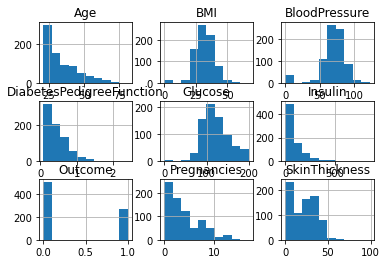

In [2]:
from matplotlib import pyplot as plt
df.hist()
plt.show()

C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

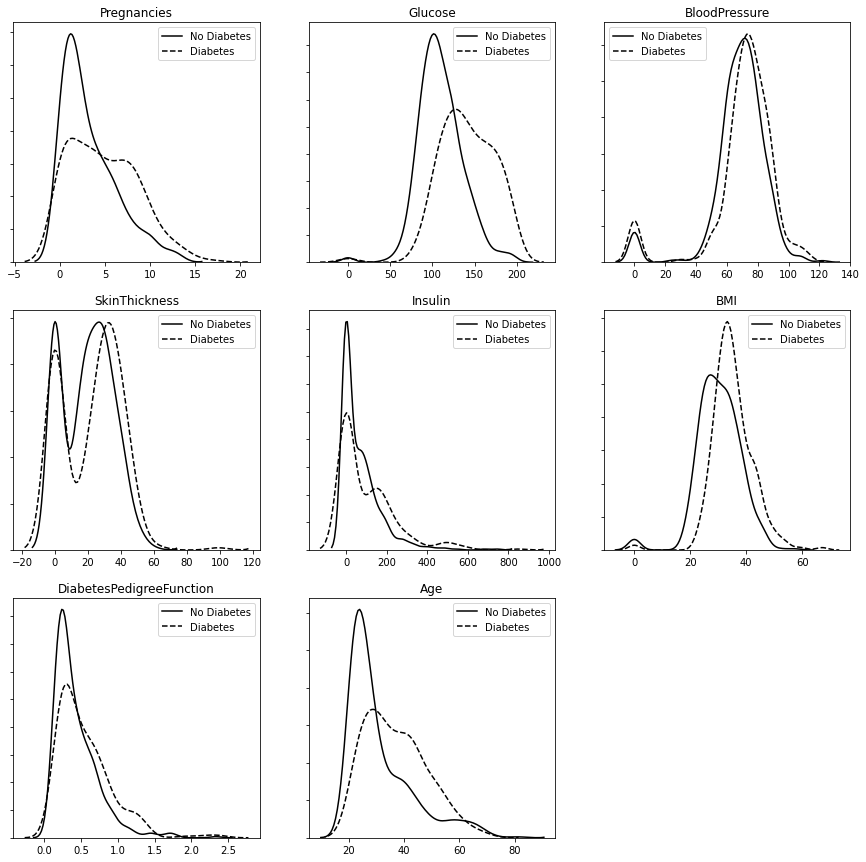

In [3]:
plt.subplots(3,3,figsize=(15,15))
# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
     ax = plt.subplot(3,3,idx+1)
     ax.yaxis.set_ticklabels([])
     sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False,
     kde_kws={'linestyle':'-','color':'black', 'label':"No Diabetes"})
     sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False,
     kde_kws={'linestyle':'--','color':'black', 'label':"Diabetes"})
     ax.set_title(col)

plt.subplot(3,3,9).set_visible(False)
plt.show()

In [4]:
print(df.isnull().any())
print("Number of rows with 0 values for each variable")
for col in df.columns:
 missing_rows = df.loc[df[col]==0].shape[0]
 print(col + ": " + str(missing_rows))

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [5]:
import numpy as np
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [6]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
 missing_rows = df.loc[df[col]==0].shape[0]
 print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [7]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [8]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [9]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [10]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [11]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Using TensorFlow backend.


Epoch 1/100
491/491 [==============================] - 0s 692us/step - loss: 0.6470 - accuracy: 0.6640
Epoch 2/100
491/491 [==============================] - 0s 69us/step - loss: 0.5959 - accuracy: 0.7373
Epoch 3/100
491/491 [==============================] - 0s 65us/step - loss: 0.5497 - accuracy: 0.7678
Epoch 4/100
491/491 [==============================] - 0s 68us/step - loss: 0.5067 - accuracy: 0.7800
Epoch 5/100
491/491 [==============================] - 0s 66us/step - loss: 0.4723 - accuracy: 0.8024
Epoch 6/100
491/491 [==============================] - 0s 69us/step - loss: 0.4448 - accuracy: 0.7963
Epoch 7/100
491/491 [==============================] - 0s 81us/step - loss: 0.4262 - accuracy: 0.7984
Epoch 8/100
491/491 [==============================] - 0s 72us/step - loss: 0.4147 - accuracy: 0.8045
Epoch 9/100
491/491 [==============================] - 0s 99us/step - loss: 0.4073 - accuracy: 0.8086
Epoch 10/100
491/491 [==============================] - 0s 82us/step - loss: 0.40

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1

In [12]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
491/491 [==============================] - 0s 81us/step - loss: 0.2792 - accuracy: 0.8900
Epoch 2/200
491/491 [==============================] - 0s 74us/step - loss: 0.2778 - accuracy: 0.8921
Epoch 3/200
491/491 [==============================] - 0s 87us/step - loss: 0.2772 - accuracy: 0.8921
Epoch 4/200
491/491 [==============================] - 0s 92us/step - loss: 0.2777 - accuracy: 0.8900
Epoch 5/200
491/491 [==============================] - 0s 95us/step - loss: 0.2744 - accuracy: 0.8859
Epoch 6/200
491/491 [==============================] - 0s 95us/step - loss: 0.2747 - accuracy: 0.8859
Epoch 7/200
491/491 [==============================] - 0s 95us/step - loss: 0.2735 - accuracy: 0.8900
Epoch 8/200
491/491 [==============================] - 0s 90us/step - loss: 0.2727 - accuracy: 0.8941
Epoch 9/200
491/491 [==============================] - 0s 87us/step - loss: 0.2705 - accuracy: 0.8961
Epoch 10/200
491/491 [==============================] - 0s 86us/step - loss: 0.270

As we increased the epochs the accuracy tends to increase because epochs indicates the number of passes of the entire training dataset the machine learning algorithm has completed so more the epochs greater is the accuracy.

In [18]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


491/491 [==============================] - 0s 35us/step
Training Accuracy: 97.15%

154/154 [==============================] - 0s 38us/step
Testing Accuracy: 71.43%



Text(33.0, 0.5, 'Actual')

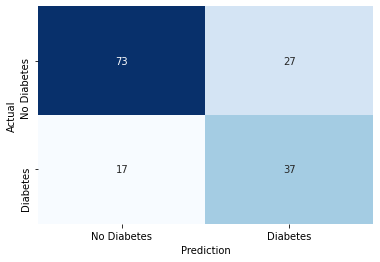

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,
 xticklabels=['No Diabetes','Diabetes'],
 yticklabels=['No Diabetes','Diabetes'],
 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")


Text(0, 0.5, 'True Positive Rate')

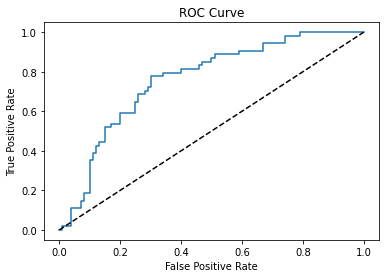

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') 
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train)
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))


Accuracy : 0.7338


C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MLP is as better as logistic regression as there isnt much difference in the accuracy.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy training: {0:.4f}".format(rf_accuracy))
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy testing: {0:.4f}".format(rf_accuracy_testdata))

Accuracy training: 0.9837
Accuracy testing: 0.7338


Random forest accuracy is lower than the other models